Enter the pressure value (Pa) for the compression stroke (1 atm = 101325 Pa): 101325
Enter the temperature value (K) for the compression stroke (ex. 300): 300
Enter the temperature value (K) for combustion (ex. 1800): 1800
Enter the ratio of specific heats (ex. 1.5): 1.5
Enter the size of the connecting rod (meters) (ex. 0.15): 0.15
Enter the volumetric compression ratio of the motor (typically between 6 to 10): 8
Enter size of bore (meters) (ex. 0.1): 0.1
Enter size of stroke (meters) (ex. 0.08): 0.08
Thermal Efficiency of the Otto Cycle = 64.644661%


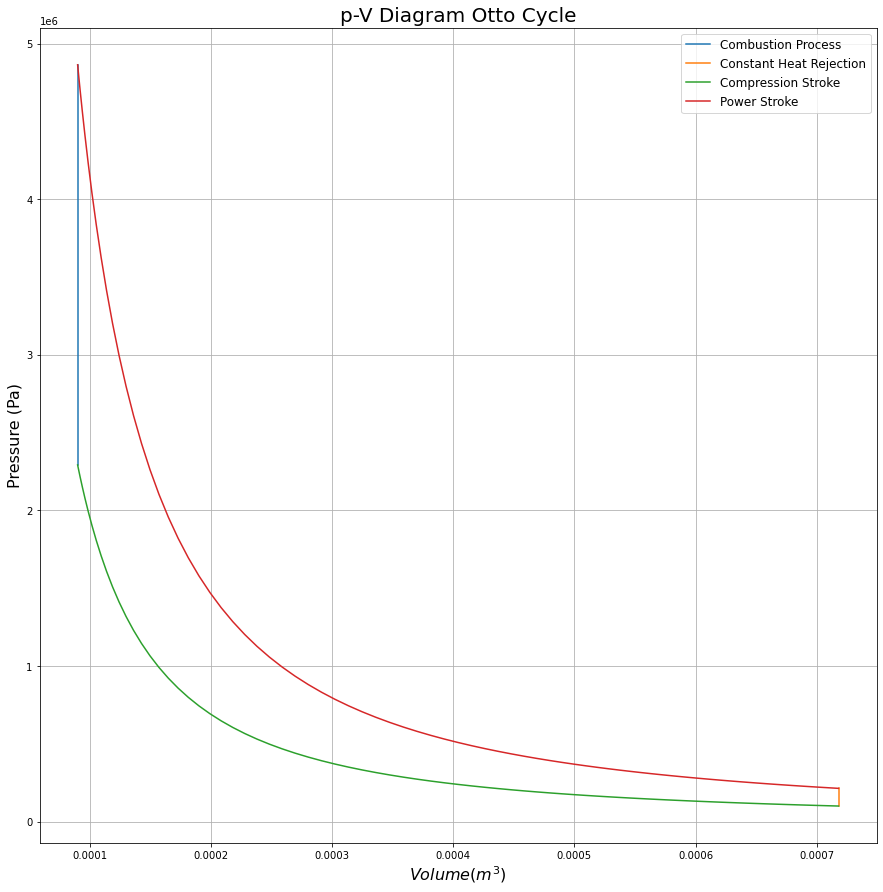

<Figure size 432x288 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

####Calculate the Thermal Efficiency of the Ideal Otto Cycle and Plot (p-V) Diagram

#eta_th_Otto_efficiency = (1 - ((t4-t1)/(t3-t2)))*100

def otto_cycle(theta, R, cr, v_clearance):
  """
  Relationship for the cylinder volume (v & theta):
  (1+0.5*(cr-1)*(R+1-np.cos(theta)-(R**2 - np.sin(theta)**2)**0.5))
  """
  return v_clearance * (1+0.5*(cr-1)*(R+1-np.cos(theta)-(R**2 - np.sin(theta)**2)**0.5))

if __name__ == '__main__':
    #state equation variables
    p1 = int(input("Enter the pressure value (Pa) for the compression stroke (1 atm = 101325 Pa): "))
    t1 = int(input("Enter the temperature value (K) for the compression stroke (ex. 300): "))
    t3 = int(input("Enter the temperature value (K) for combustion (ex. 1800): "))
    gamma = float(input("Enter the ratio of specific heats (ex. 1.5): "))
    #motor geometry
    con_rod = float(input("Enter the size of the connecting rod (meters) (ex. 0.15): "))
    cr = int(input("Enter the volumetric compression ratio of the motor (typically between 6 to 10): "))
    bore = float(input("Enter size of bore (meters) (ex. 0.1): "))
    stroke = float(input("Enter size of stroke (meters) (ex. 0.08): "))

#crank pin radius
radius_piston = stroke/2 
R = con_rod/stroke #length ratio between connecting rod and piston radius

#Swept & clearance volumes
v_swept = (np.pi/4)*pow(bore,2)*stroke
v_clearance = v_swept/(cr-1)
v1 = v_clearance + v_swept

#state point variable 2
  #constant volume heat addition (stages 2 to 3)
v2 = v_clearance
p2 = p1*pow(v1,gamma)/(pow(v2,gamma))
  #p1v1/T2 = p2v2/T2
temp = p1*v1/t1
t2 = p2*v2/temp
theta = np.linspace(0, np.pi, 100)
v_compression = otto_cycle(theta, R, cr, v_clearance)
constant = p1*pow(v1,gamma)
p_compression = []
for v in v_compression:
  p_compression.append(constant/pow(v, gamma))
        
#state point variable 3
  #power stroke (stages 3 to 4)  
v3 = v2
  #p3v3/3 = p3v2/T2 or p3v3/t3 = temp
p3 = temp*t3/v3
    
#state point variable 4
    #constant volume heat rejection (steps 4 to 1)
v4 = v1
    #p4v4^gamma = p3v4^gamma
p4 = p3*pow((v3/v4), gamma)
theta = np.linspace(np.pi, 2*np.pi,100)
v_expansion = otto_cycle(theta, R, cr, v_clearance)
constant = p3*pow(v3,gamma)
p_expansion = []
for v in v_expansion:
  p_expansion.append(constant/pow(v, gamma))
temp = p3*v3/t3
t4 = t3/pow(cr, gamma - 1)

#thermal efficiency of the Otto cycle
eta_th = (1 - ((t4-t1)/(t3-t2)))*100
print('Thermal Efficiency of the Otto Cycle = {:3f}%'.format(eta_th))
#Thermal efficiency of the Otto Cycle will be represented as a percentage

#Otto cycle plot
plt.figure(figsize=(15,15))
plt.grid()
plt.plot([v2,v3],[p2,p3], label = 'Combustion Process')
plt.plot([v4,v1],[p4,p1], label = 'Constant Heat Rejection')
plt.plot(v_compression,p_compression, label = 'Compression Stroke')
plt.plot(v_expansion,p_expansion, label = 'Power Stroke')

plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel(xlabel='$Volume (m^{3})$', fontsize=16)
plt.ylabel('Pressure (Pa)', fontsize=16)
plt.title('p-V Diagram Otto Cycle', fontsize=20)
pV_diagram = plt.gcf()
plt.show()
plt.draw()
pV_diagram.savefig("p-V Diagram Otto Cycle.png", dpi=300)
#p-v diagram is represented by four points (intake and exhaust stroke not displayed). 
#Stages 1 to 2 represents compression stroke (work being done)
#Stages 2 to 3 represents constant volume combustion process with an increase in temperature and pressure
#Stages 3 to 4 represents the 'power-stroke' where volume is increased and pressure decreases
#Stages 4 to 1 represents constant volume heat rejection